In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Mount

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pizza.csv")
data.head()

,x,y
0,6,350
1,8,775
2,12,1150
3,14,1325
4,18,1675


from matplotlib import pyplot as plt
_df_0['x'].plot(kind='hist', bins=20, title='x')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['y'].plot(kind='hist', bins=20, title='y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='x', y='y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['x']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'x'}, axis=1)
              .sort_values('x', ascending=True))
  xs = counted['x']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('x', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('x')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['y']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'y'}, axis=1)
              .sort_values('y', ascending=True))
  xs = counted['y']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('y', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('y')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['x'].plot(kind='line', figsize=(8, 4), title='x')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['y'].plot(kind='line', figsize=(8, 4), title='y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# View the dataset

print("Dataset:")
print(data)

Dataset:
    x     y
0   6   350
1   8   775
2  12  1150
3  14  1325
4  18  1675


In [ ]:
# Split the dataset

# Separate features (X) and target (y)
X = data[['x']]  # Features need to be 2D, so use double brackets
y = data['y']    # Target variable

# Split dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Show the splits
print("X_train:")
print(X_train)
print("\ny_train:")
print(y_train)

print("\nX_test:")
print(X_test)
print("\ny_test:")
print(y_test)

X_train:
    x
2  12
0   6
3  14

y_train:
2    1150
0     350
3    1325
Name: y, dtype: int64

X_test:
    x
1   8
4  18

y_test:
1     775
4    1675
Name: y, dtype: int64


In [ ]:
# 3. Build and train the model

model = LinearRegression()
model.fit(X_train, y_train)


# 4. Predict on the test set
y_pred = model.predict(X_test)


# 5. Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Model Coefficient: {model.coef_[0]:.2f}")
print(f"Model Intercept: {model.intercept_:.2f}")



print("\nPredicted vs Actual values:")
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {pred:.2f}")



# Performance Analysis

# Calculate additional metrics
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nPerformance Analysis:")
print("-" * 25)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score interpretation: The model explains {r2*100:.1f}% of the variance in the data.")


Mean Squared Error: 29841.44
R² Score: 0.85
Model Coefficient: 124.52
Model Intercept: -386.54

Predicted vs Actual values:
Actual: 775, Predicted: 609.62
Actual: 1675, Predicted: 1854.81

Performance Analysis:
-------------------------
Root Mean Squared Error (RMSE): 172.75
Mean Absolute Error (MAE): 172.60
R² Score interpretation: The model explains 85.3% of the variance in the data.


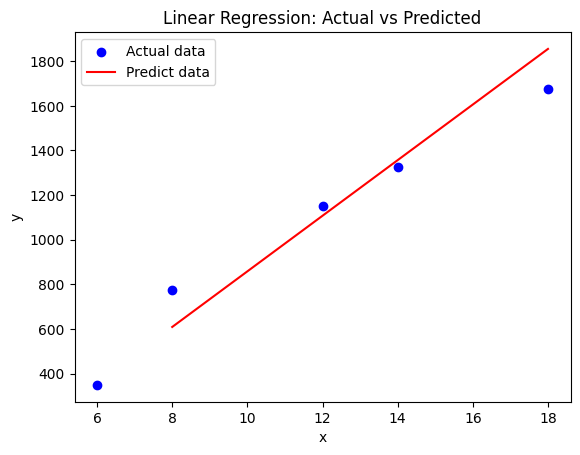

In [ ]:
# 6. Visualization
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label= 'Predict data' )
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()